## Support Vector Machine Classification

## Preliminaries

In [243]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.samples as samples


from sklearn import svm
from sklearn import model_selection
from E4525_ML import plots

In [244]:
seed=4543
np.random.seed(seed)

### Sample Data Generation

In [245]:
N=40
X,Y=samples.ellipsoid(N//2)
X_test,Y_test=samples.ellipsoid(N//2)

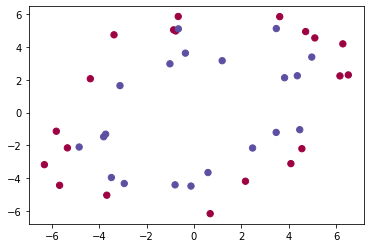

In [246]:
plt.scatter(X[:,0],X[:,1],c=Y, s=40, cmap=plt.cm.Spectral)

## Polinomial features



$$
        X_1, X_2, X_1^2, X_1 X_2, X_2^2
$$


In [247]:
def phi(X):
    X1=X[:,0]
    X2=X[:,1]
    return np.vstack((X1,X2,X1**2,X1*X2,X2**2)).T

In [248]:
Z=phi(X)
Z_test=phi(X_test)

## Linear SVM

In [249]:
model=svm.SVC(C=1000000000,kernel="linear") 
np.average(model_selection.cross_val_score(model,Z,Y,cv=10))


0.8

In [250]:
model.fit(Z,Y)
print(f'The number of support vectors is {len(model.support_vectors_)}')

The number of support vectors is 8


In [251]:
print(max(model.dual_coef_[0]))


1000000000.0


## 10-fold cross validation - optimal value of C 


In [252]:
Cs=[0.001,0.01,0.1,1,10,100,1000,10000]

In [253]:
model=svm.SVC(kernel="linear") 

parameters = {'C':Cs}
clf=model_selection.GridSearchCV(model,parameters,cv=10)
clf.fit(Z,Y)
best_model=clf.best_estimator_

best_model.fit(Z,Y)
support_vectors=best_model.support_vectors_
print(support_vectors)

dual_coef=best_model.dual_coef_[0]

print(max(abs(dual_coef)))


[[ 4.71747825  4.93114745 22.25460101 23.26258084 24.3162152 ]
 [-0.85688319  5.03507915  0.7342488  -4.31447467 25.35202202]
 [-0.76763744  4.96832361  0.58926724 -3.81387121 24.68423951]
 [-5.3422035  -2.15364523 28.53913824 11.5052111   4.63818779]
 [ 2.1758714  -4.18493477  4.73441636 -9.10587988 17.51367899]
 [ 4.46813644 -1.04616339 19.96424323 -4.67440075  1.09445783]
 [ 3.4780773   5.11548949 12.09702169 17.79206787 26.16823275]
 [-0.65807057  5.09593951  0.43305688 -3.35348784 25.96859946]
 [-4.84612403 -2.10143256 23.48491814 10.18380284  4.41601881]]
0.1


In [254]:
np.average(model_selection.cross_val_score(best_model,Z, Y,cv=10))


0.95

In [255]:
best_model.fit(Z,Y)
support_vectors_classes=Y[best_model.support_]
print(f'The class Y for each support vector is {support_vectors_classes}')

The class Y for each support vector is [0 0 0 0 0 1 1 1 1]



$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class


In [256]:
support_coef=best_model.dual_coef_[0].ravel()
support_coef.sum()


-2.7755575615628914e-17

In [257]:
C=0.1
index=[]

for i in range (0,len(support_coef)):
    if abs(support_coef[i])==C:
        index.append(i)
print(index)

print(support_vectors[index])
        

[2, 6, 7, 8]
[[-0.76763744  4.96832361  0.58926724 -3.81387121 24.68423951]
 [ 3.4780773   5.11548949 12.09702169 17.79206787 26.16823275]
 [-0.65807057  5.09593951  0.43305688 -3.35348784 25.96859946]
 [-4.84612403 -2.10143256 23.48491814 10.18380284  4.41601881]]


## Vector of loadings $w$

In [258]:
#check with the built-in function 
w=best_model.coef_[0]
print(w)

W=support_coef[:,np.newaxis]*support_vectors
W=W.sum(axis=0)

print(W)

[ 0.14682956  0.06861315 -0.37866999  0.25213885 -0.37136477]
[ 0.14682956  0.06861315 -0.37866999  0.25213885 -0.37136477]


## We compute $b$

In [259]:
# check with the built-in function 

b=best_model.intercept_[0]
print(b)
if 0 not in index:
    print('True')
    
Y0=support_coef[0]/abs(support_coef[0])


b= - np.dot(w.T,support_vectors[0]) +1/Y0

print(b)


9.56072019709151
True
9.560927983540612


In [260]:
print(w.shape)
print(Z.shape)

(5,)
(40, 5)


In [261]:
def prediction (Z,w,b):
    Y=np.zeros(len(Z))
    for i in range (0,len(Z)):
        Y[i]=np.dot(w.T,Z[i,:])+b
    Y=(np.sign(Y)+1)/2
    return Y

Y_pred_1=prediction (Z,w,b)
print(np.average(Y_pred_1==Y))
 
Y_pred=best_model.predict(Z)
print(np.average(Y_pred==Y))

if np.average(Y_pred_1==Y)==np.average(Y_pred==Y):
    print('The accuracy of your function is the same as the accuracy of the predict method of the best estimator')

0.975
0.975
The accuracy of your function is the same as the accuracy of the predict method of the best estimator


## Polinomial Kernel

Polinomial kernel:
$$
    K(x,x') = (1 + x^T x')^2
$$


In [262]:
poly_model=svm.SVC(C=1000000000,kernel="poly",degree=2,gamma=1,coef0=1)
np.average(model_selection.cross_val_score(poly_model,X,Y,cv=10))

0.9

10-fold cross validation - optimal values of $C$ and $\gamma$ to use while fitting a  SVC polynomial kernel with the untransformed training data `X`. Keep the constant $c$ (`coef0`) fixed at 1.

Display clearly the optimal values of $C$ and $\gamma$, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ and $\gamma$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the values of best estimator's $C$  and $\gamma$ parameters and the array of support vectors.
6. As the search may be a bit time consuming, it may be useful so set the `GridSearchCV` verbose parameter so that you can see if the search is making progress.

In [263]:
Cs=[0.001,0.01,0.1,1,10,100]
gammas=[0.01,0.1,1,10,100]

In [264]:
model=svm.SVC(kernel="poly",degree=2,coef0=1)
parameters = {'C':Cs,'gamma':gammas}
clf=model_selection.GridSearchCV(model,parameters,cv=10)
clf.fit(Z,Y)
best_poly_model=clf.best_estimator_

best_poly_model.fit(X,Y)
support_vectors=best_poly_model.support_vectors_
print(len(support_vectors),support_vectors)

best_poly_model

32 [[ 4.5580055  -2.20267639]
 [ 6.16510186  2.23039578]
 [ 4.71747825  4.93114745]
 [ 5.10518255  4.54402952]
 [ 3.62216133  5.8396358 ]
 [-0.66254926  5.85047639]
 [-0.85688319  5.03507915]
 [-0.76763744  4.96832361]
 [-4.37374094  2.05802205]
 [-5.81048568 -1.13915865]
 [-5.3422035  -2.15364523]
 [-3.67927333 -5.03515141]
 [-5.6712814  -4.43350214]
 [ 0.68678119 -6.16216673]
 [ 4.09448442 -3.11332949]
 [ 2.1758714  -4.18493477]
 [ 4.46813644 -1.04616339]
 [ 3.82734945  2.11959121]
 [ 4.36494726  2.24028098]
 [ 4.97610384  3.37897384]
 [ 3.4780773   5.11548949]
 [-0.36009911  3.61832315]
 [-0.65807057  5.09593951]
 [-3.12192323  1.63754771]
 [-3.72790519 -1.31951232]
 [-3.81196873 -1.47706162]
 [-3.48451533 -3.95952945]
 [-4.84612403 -2.10143256]
 [-2.94162577 -4.32396285]
 [-0.12372473 -4.4791839 ]
 [-0.79576065 -4.4059671 ]
 [ 3.47275917 -1.2114773 ]]


SVC(C=10, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

In [265]:
support_vectors_index=best_poly_model.support_
Y[support_vectors_index]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class


In [266]:
support_coef=best_poly_model.dual_coef_[0].ravel()
support_coef.sum()
print(len(support_coef))

32


<div class="alert alert-block alert-info"> Problem 3.5 </div>
Show which support vectors are in violation of the margin


In [267]:
index=[]

for i in range (0,len(support_coef)):
    if abs(support_coef[i])==10:
        index.append(i)
print(index)
support_vectors_violation=support_vectors[index]
print(support_vectors_violation)


[0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30]
[[ 4.5580055  -2.20267639]
 [ 6.16510186  2.23039578]
 [ 4.71747825  4.93114745]
 [ 5.10518255  4.54402952]
 [-0.85688319  5.03507915]
 [-0.76763744  4.96832361]
 [-4.37374094  2.05802205]
 [-5.81048568 -1.13915865]
 [-5.3422035  -2.15364523]
 [-3.67927333 -5.03515141]
 [ 0.68678119 -6.16216673]
 [ 4.09448442 -3.11332949]
 [ 2.1758714  -4.18493477]
 [ 4.46813644 -1.04616339]
 [ 3.82734945  2.11959121]
 [ 4.36494726  2.24028098]
 [ 4.97610384  3.37897384]
 [ 3.4780773   5.11548949]
 [-0.36009911  3.61832315]
 [-0.65807057  5.09593951]
 [-3.12192323  1.63754771]
 [-3.81196873 -1.47706162]
 [-3.48451533 -3.95952945]
 [-4.84612403 -2.10143256]
 [-2.94162577 -4.32396285]
 [-0.12372473 -4.4791839 ]
 [-0.79576065 -4.4059671 ]]


<div class="alert alert-block alert-info"> Problem 3.6 </div>
Write a function that, give two matrices $X_{i,d}$, $X'_{j,d}$ for $i=1,\dots,N_1$, $j=1,\dots,N_2$ and $d=1,\dots D$
computes the kernel products
$$
    K_{i,j} = \textrm{kernel}(X_i,X'_j)
$$
where 'kernel' is the optimal kernel you found by cross-validation

In [268]:
gamma=0.01
def Kernel(X1,X2,gamma):
    return (1 + gamma*np.dot(X1.T,X2))**2

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Write a prediction function that classifies points as having class $y=0$ or $y=1$ in terms of $\alpha$, $b$, and the support vectors, using equation

$$
  y(x) =  \frac{\textrm{sign}( \sum_i \alpha_i y_i K(x,x_i) + b ) + 1}{2}
$$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

In [269]:
b=best_poly_model.intercept_[0]

gamma=0.01
def prediction (X,gamma):
    Y=np.zeros(len(X))
    for i in range (0,len(X)):
        for j in range (0,len(support_vectors)):
            Y[i]+=support_coef[j]*Kernel(X[i],support_vectors[j],gamma)
        Y[i]=(np.sign(Y[i]+b)+1)/2
    return Y

Y_pred_1=prediction (X,gamma)
print(np.average(Y_pred_1==Y))

Y_pred=best_poly_model.predict(X)
print(np.average(Y_pred==Y))

if np.average(Y_pred_1==Y)==np.average(Y_pred==Y):
    print('The accuracy of your function is the same as the accuracy of the predict method of the best estimator')

0.9
0.9
The accuracy of your function is the same as the accuracy of the predict method of the best estimator


<div class="alert alert-block alert-info"> Problem 3.8 </div>
Use the function `decision_boundary_2d` from the python module `E4525_ML.plots` to display a graph of the training points and 
the optimal estimator descision boundary.

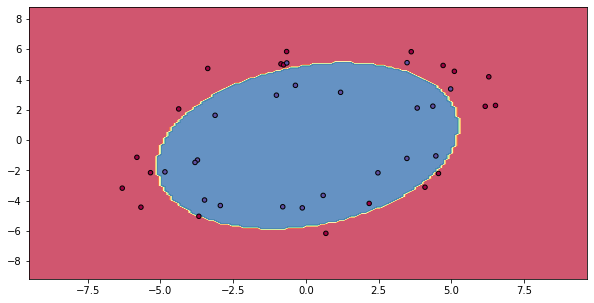

In [270]:
f,ax= plt.subplots(1,1, sharey=True,figsize=(10,5))
plots.decision_boundary_2d(best_poly_model,X,Y,ax,alpha=0.8,slack=0.25)